In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

### FFT of a temporally varying signal 

We shall consider a signal that varies with time. 

In [2]:
sampling_rate = 2000
sampling_interval = 1./sampling_rate
total_time = 3
t = np.arange(0, total_time, sampling_interval)
f = 5.5 * np.cos(2 * np.pi * 10 * t  - np.pi /4) - \
        12.3 * np.cos(2 * np.pi * 15 * t) + \
        3.2 * np.cos(2 * np.pi * 25 * t) + \
        6 * np.cos(2 * np.pi * 200 * t - np.pi/8) + \
        np.random.randn(t.shape[0]) * 2 # the signal as a function of time.

"""
f2 = 5.5 * np.cos(2*t - np.pi /4) - \
        2.3 * np.cos(10*t) + \
        3.2 * np.cos(25*t - np.pi/6)

f3 = 5.5 * np.cos(2*t - np.pi /4) - \
        2.3 * np.cos(10*t)

f4 = np.sin(120*t)
"""

'\nf2 = 5.5 * np.cos(2*t - np.pi /4) -         2.3 * np.cos(10*t) +         3.2 * np.cos(25*t - np.pi/6)\n\nf3 = 5.5 * np.cos(2*t - np.pi /4) -         2.3 * np.cos(10*t)\n\nf4 = np.sin(120*t)\n'

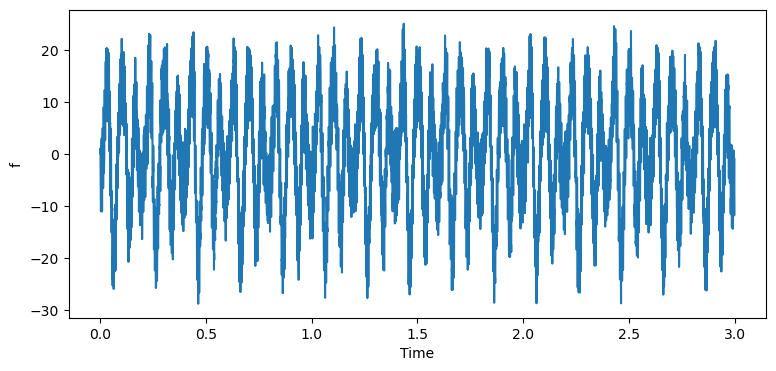

In [3]:
fig = plt.figure(figsize=(9, 4))
plt.plot(t,f)
plt.xlabel('Time')
plt.ylabel('f')
plt.show()

(0.0, 250.0)

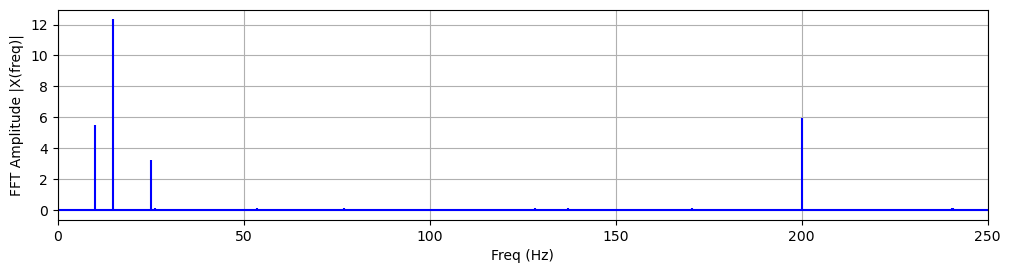

In [5]:
# sampling interval
Y = np.fft.fft(f) #Fourier of f
N = len(Y) #num_pts -> data length
n = np.arange(N) 
T = N/sampling_rate
freq = sampling_rate * np.arange(0, int(N/2))/N  

P2 = np.abs(Y/N);
P1 = P2[0:int(N/2)]
P1[1:-2] = 2*P1[1:-2]


plt.figure(figsize = (12, 6))
plt.subplot(211)

plt.stem(freq, P1 , 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.grid()
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 250)

#plt.subplot(212)
#plt.plot(t, np.real( np.fft.ifft(Y) ), 'r')
#plt.xlabel('Time')
#plt.ylabel('Signal')
#plt.tight_layout()
#plt.show()

### Butterworth filter

In [9]:
filter_order = 10
critical_frequencies = [150]
sos = signal.butter(N=filter_order, Wn=critical_frequencies, btype='lowpass', \
                    output='sos', fs=sampling_rate)
filtered = signal.sosfilt(sos,f)

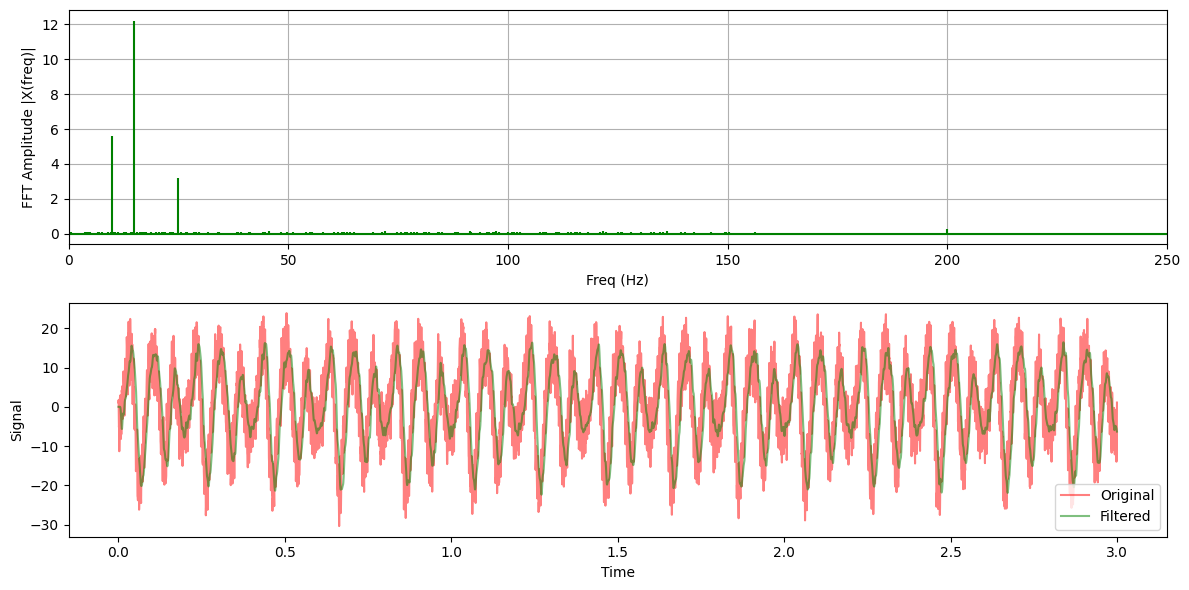

In [10]:
# sampling interval
del Y
Y = np.fft.fft(filtered) 
N = len(Y)
n = np.arange(N)
T = N/sampling_rate
freq = sampling_rate * np.arange(0, int(N/2))/N  

P2 = np.abs(Y/N);
P1 = P2[0:int(N/2)]
P1[1:-2] = 2*P1[1:-2]


plt.figure(figsize = (12, 6))
plt.subplot(211)

plt.stem(freq, P1 , 'g', \
         markerfmt=" ", basefmt="-g")
plt.xlabel('Freq (Hz)')
plt.grid()
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 250)

plt.subplot(212)
plt.plot(t, f, 'r', label='Original', alpha=0.5)
plt.plot(t, np.real( np.fft.ifft(Y) ), 'g', alpha=0.5, label='Filtered')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Signal')
plt.tight_layout()
plt.show()